In [1]:
%load_ext autoreload
%autoreload 2

In [10]:
%matplotlib inline
from __future__ import division
from matplotlib import pyplot as plt
import numpy as np
import h5py
import os

from synsets import load_syn_data
from val_data import load_val_database, ValImage, ObjectAnnotation
from data_loader import ValDataLoader
from model_data import *

In [7]:
results = "../results/"
bb_folder = "../bounding_boxes/"
db_bb_file = os.path.join(bb_folder, "bb_center_010.h5")
results_file = os.path.join(results, "preds_resnet50_original.h5")

In [11]:
# Load databases
syn_data = load_syn_data()
db = load_val_database(syn_data)
models = load_model_results(syn_data, db)

Loaded DET data
Loaded CLSLOC data
Computed relation between CLSLOC and DET.
Loading Keras imagenet class index
Loading validation data...
Data loaded! 20121 images
Finding val images with only one object..
One object database built: 7706 images
Loading ground truth labels...
Loaded!
Computing image distribution in each of the 200 categories...
Done!
Processing model resnet50
DONE! Processing model resnet50
Processing model inceptionv3
DONE! Processing model inceptionv3
Processing model vgg16
DONE! Processing model vgg16
Processing model vgg19
DONE! Processing model vgg19
Processing model alexnet
DONE! Processing model alexnet
All models processed!!


### Category Analysis

In [5]:
# Order categories by number of images in the database
order_cat_list = sorted(db.det_categories.values(), key=lambda x: x.num, reverse=True)
def print_cat_list(cl):
    for c in cl:
        print("\t{} ({}, idx:{}) num: {}".format(c.name,c.wnid,c.idx, c.num))
def cats_with_at_least(cl, num):
    cats = [x for x in cl if x.num>=num]
    return len(cats), np.sum([x.num for x in cats])

# Statistics
print("Cats with >=100: {}\nCats with >=50: {}\nCats with >=20: {}\n".
     format(cats_with_at_least(order_cat_list, 100),
           cats_with_at_least(order_cat_list, 50),
           cats_with_at_least(order_cat_list, 20)))

print("Top10: (same as num with >= 100 imgs)")
print_cat_list(order_cat_list[:10])
# print_cat_list([x for x in order_cat_list if x.num>=20])
print("Bottom 20 with more than 1 image:")
order_with_img = [x for x in order_cat_list if x.num>0]
print_cat_list(order_with_img[-20:])
print("Categories with no images:")
print_cat_list([x for x in order_cat_list if x.num==0])
cat_with_less_than_10 = [x for x in order_cat_list if x.num<10]
print("Categories with less than 10 images ({})".format(len(cat_with_less_than_10)))
print_cat_list(cat_with_less_than_10)

Cats with >=100: (10, 4763)
Cats with >=50: (20, 5407)
Cats with >=20: (58, 6565)

Top10: (same as num with >= 100 imgs)
	bird (n01503061, idx:26) num: 1629
	dog (n02084071, idx:58) num: 1365
	person (n00007846, idx:124) num: 371
	snake (n01726692, idx:159) num: 353
	lizard (n01674464, idx:105) num: 246
	monkey (n02484322, idx:113) num: 229
	butterfly (n02274259, idx:34) num: 199
	watercraft (n04530566, idx:197) num: 147
	car (n02958343, idx:37) num: 112
	turtle (n01662784, idx:188) num: 112
Bottom 20 with more than 1 image:
	flute (n03372029, idx:69) num: 2
	harp (n03495258, idx:86) num: 2
	laptop (n03642806, idx:101) num: 2
	miniskirt (n03770439, idx:112) num: 2
	popsicle (n07615774, idx:133) num: 2
	racket (n04039381, idx:142) num: 2
	ski (n04228054, idx:156) num: 2
	snowmobile (n04252077, idx:160) num: 2
	stretcher (n04336792, idx:172) num: 2
	swimming trunks (n04371430, idx:174) num: 2
	trombone (n04487394, idx:186) num: 2
	unicycle (n04509417, idx:190) num: 2
	balance beam (n0277

In [158]:
db.det_categories[2][2:9:2]

[ValImage(idx=2878, img_path='../ILSVRC2013_DET_val/ILSVRC2012_val_00009537.JPEG', objects=[ObjectAnnotation(wnid='n02691156', synset={'wnid': u'n02691156', 'id': 2, 'name': u'airplane', 'desc': u' an aircraft powered by propellers or jets'}, xmin=71, xmax=400, ymin=123, ymax=213)], width=500, height=333),
 ValImage(idx=3548, img_path='../ILSVRC2013_DET_val/ILSVRC2012_val_00011510.JPEG', objects=[ObjectAnnotation(wnid='n02691156', synset={'wnid': u'n02691156', 'id': 2, 'name': u'airplane', 'desc': u' an aircraft powered by propellers or jets'}, xmin=0, xmax=498, ymin=111, ymax=281)], width=500, height=357),
 ValImage(idx=3828, img_path='../ILSVRC2013_DET_val/ILSVRC2012_val_00012386.JPEG', objects=[ObjectAnnotation(wnid='n02691156', synset={'wnid': u'n02691156', 'id': 2, 'name': u'airplane', 'desc': u' an aircraft powered by propellers or jets'}, xmin=14, xmax=455, ymin=100, ymax=247)], width=500, height=375),
 ValImage(idx=4805, img_path='../ILSVRC2013_DET_val/ILSVRC2012_val_00015498.J

In [160]:
len(db.det_categories[2].indexes)
db.det_categories[2].num

35

In [61]:
db.val_data_single[180]

ValImage(idx=410, img_path='../ILSVRC2013_DET_val/ILSVRC2012_val_00001390.JPEG', objects=[ObjectAnnotation(wnid='n02691156', synset={'wnid': u'n02691156', 'id': 2, 'name': u'airplane', 'desc': u' an aircraft powered by propellers or jets'}, xmin=22, xmax=499, ymin=93, ymax=273)], width=500, height=374)

In [68]:
len(db.det_categories[1][:])

('Detected slice: ', slice(None, None, None))
('Computed all indexes: ', array([ 180,  489, 1199, 1365, 1500, 1608, 1631, 1902, 2048, 2253, 2453,
       2602, 2983, 3040, 3094, 3160, 3212, 3296, 3591, 3747, 4050, 4065,
       4525, 4582, 4790, 4881, 5058, 5228, 5890, 6221, 6345, 6387, 6507,
       7013, 7547]))


35

In [25]:
db.val_data_single[np.where(db.labels == 155)]

TypeError: list indices must be integers, not tuple

In [7]:
data_loader = ValDataLoader(db, (224,224), db_bb_file)

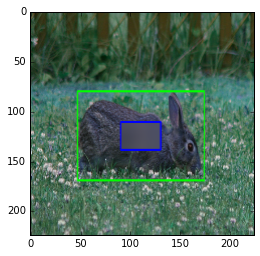

In [8]:
# Show database image (original) & with bounding box
_, img = data_loader.prepare_img(15, add_noise=True, show_bb=True)
plt.imshow(img)

In [59]:
syn_data.det_synsets[syn_data.det_synsets_id[db.labels[2]]]["name"]

u'porcupine'

In [61]:
syn_data.det_name_from_id(db.labels[2])

u'porcupine'

In [68]:
syn_data.det_name_from_id(db.labels[idx])

'rabbit'

In [79]:
idx = 48
f_h5 = h5py.File(results_file)
top5_dataset = f_h5["top_5"]
best_5 = top5_dataset[idx,:]
print best_5
names = [syn_data.clsloc_synsets[syn_data.clsloc_synsets_id[x]]["name"] for x in best_5]
print names
det_cats = syn_data.decode_det_category(best_5)
print det_cats
names = [syn_data.det_synsets[syn_data.det_synsets_id[x]]["name"] for x in det_cats]
print names

[109  98 107 208  36]
[u'Scotch terrier, Scottish terrier, Scottie', u'Afghan hound, Afghan', u'Kerry blue terrier', u'briard', u'giant schnauzer']
[58, 58, 58, 58, 58]
[u'dog', u'dog', u'dog', u'dog', u'dog']


In [10]:
idx = 48
f_h5 = h5py.File(results_file)
top5_det = f_h5["top5_det"][idx, :]
top5_clsloc = f_h5["top5_clsloc"][idx, :]
print top5_clsloc
names = [syn_data.clsloc_synsets[syn_data.clsloc_synsets_id[x]]["name"] for x in top5_clsloc]
print names
print top5_det
names = [syn_data.det_synsets[syn_data.det_synsets_id[x]]["name"] for x in top5_det]
print names

[109   4 126 208  93]
[u'Scotch terrier, Scottish terrier, Scottie', u'Australian terrier', u'Irish terrier', u'briard', u'groenendael']
[58 58 58 58 58]
[u'dog', u'dog', u'dog', u'dog', u'dog']


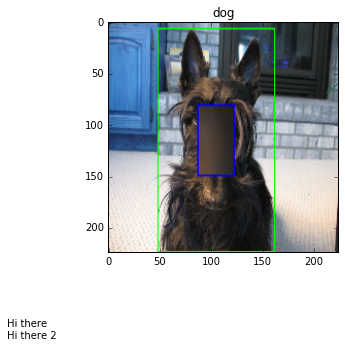

In [11]:
# Show database image (original) & with bounding box
_, img = data_loader.prepare_img(idx, add_noise=True, show_bb=True)
# plt.imshow(img)
# plt.subplot(1,2,1)
fig = plt.figure()
ax1 = fig.add_axes((.1,.4,1,.8))
ax1.imshow(img)
ax1.set_title(syn_data.det_name_from_id(db.labels[idx]))
# plt.subplot(1,2,2)
fig.text(0.1,0.1,"Hi there\nHi there 2")

## Show example images of categories

In [161]:
db.det_categories[2]

DetCategory(idx=2, wnid=u'n02691156', name=u'airplane', num=35)

In [164]:
def show_cat_imgs(data_loader, cat, cat_idx):
    single_idxs = cat.indexes[cat_idx]
    for sidx,cidx in zip(single_idxs, cat_idx):        
        _, img = data_loader.prepare_img(sidx, add_noise=True, show_bb=True)
        plt.figure()
        plt.imshow(img)
        plt.title("inside_cat_idx: {}, single_idx: {}, name: {}".
                 format(cidx, sidx, cat.name))


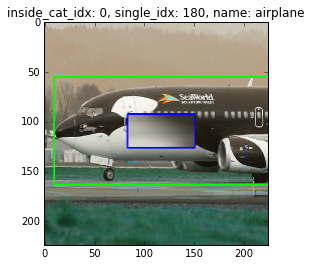

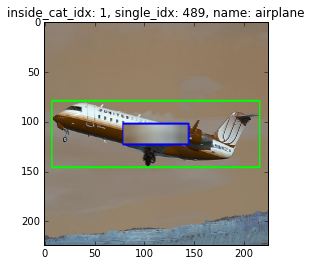

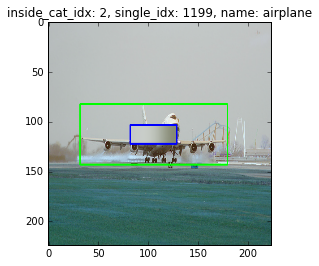

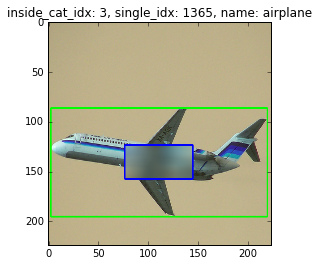

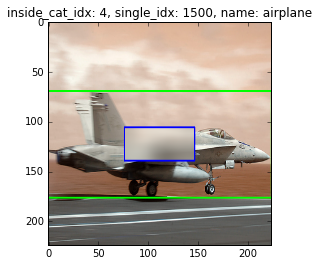

In [166]:
show_cat_imgs(data_loader, db.det_categories[2], range(5))

# Computing accuracy

In [167]:
idx = 12
f_h5 = h5py.File(results_file)
top5_dataset = f_h5["top_5"]
best_5 = top5_dataset[idx,:]
print best_5
names = [syn_data.clsloc_synsets[syn_data.clsloc_synsets_id[x]]["name"] for x in best_5]
print names
det_cats = syn_data.decode_det_category(best_5)
print det_cats
names = [syn_data.det_synsets[syn_data.det_synsets_id[x]]["name"] for x in det_cats]
print names

[401 383 384 404 403]
[u'black grouse', u'cock', u'hen', u'prairie chicken, prairie grouse, prairie fowl', u'ruffed grouse, partridge, Bonasa umbellus']
[26, 26]
[u'bird', u'bird']


In [168]:
print top5_dataset[:,:]
print db.labels

[[479 492 493 491 490]
 [490 492 491 493 479]
 [ 13 215  35 816  16]
 ..., 
 [722 856 339 705 340]
 [ 74   7  61  78  62]
 [212 195  23 167  14]]
[159 159 134 ..., 124 144 120]


In [169]:
syn_data.clsloc2det_cat_matrix(top5_dataset[:,:])[12,:]

array([ 0, 26, 26,  0,  0])

In [154]:
db.det_categories[0]

DetCategory(idx=1, wnid=u'n02672831', name=u'accordion', num=0)

In [170]:
top5_det = syn_data.clsloc2det_cat_matrix(top5_dataset[:,:])

In [181]:
np.sum(top5_det[:,0] == 0)

1634

## Compute accuracy

In [185]:
print db.labels
print top5_det

[159 159 134 ..., 124 144 120]
[[159 159 159 159 159]
 [159 159 159 159 159]
 [134   0   0   0   0]
 ..., 
 [  0  52   0   0   0]
 [  0 144  20 175  70]
 [120   0   0  90 154]]


In [201]:
top5_det[:,:1]

array([[159],
       [159],
       [134],
       ..., 
       [  0],
       [  0],
       [120]])

In [207]:
np.zeros((2,2), dtype='bool')

array([[False, False],
       [False, False]], dtype=bool)

In [204]:
cats_mat = top5_det[:,:5]
res_mat = np.zeros(cats_mat.shape, dtype=np.bool)
num_c = cats_mat.shape[1]
for c in range(num_c):
    res_mat[:,c] = db.labels == cats_mat[:,c]
res_mat

array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True, False, False, False, False],
       ..., 
       [False, False, False, False, False],
       [False,  True, False, False, False],
       [ True, False, False, False, False]], dtype=bool)

In [205]:
np.sum(res_mat, axis=1, dtype=np.bool)

array([ True,  True,  True, ..., False,  True,  True], dtype=bool)

In [188]:
db.labels == top5_det[:,0]

array([ True,  True,  True, ..., False, False,  True], dtype=bool)

## Read accuracy results

In [14]:
idx = 12
f_h5 = h5py.File(results_file)
top5ok_dataset = f_h5["correct_top5"]
np.sum(top5ok_dataset[:])/db.num_single

0.80859070853880088

In [19]:
wrong_idx = np.where(top5ok_dataset[:] == False)[0]
print("Num wrong: {}".format(len(wrong_idx)))

Num wrong: 1475


[ 36  60  47  93 146]
[u'giant schnauzer', u'Newfoundland, Newfoundland dog', u'Bouvier des Flandres, Bouviers des Flandres', u'groenendael', u'flat-coated retriever']
[58 58 58 58 58]
[u'dog', u'dog', u'dog', u'dog', u'dog']


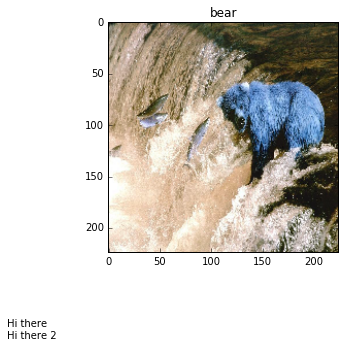

In [22]:
idx = wrong_idx[12]
# Show database image (original) & with bounding box
_, img = data_loader.prepare_img(idx, add_noise=False, show_bb=False)
# plt.imshow(img)
# plt.subplot(1,2,1)
fig = plt.figure()
ax1 = fig.add_axes((.1,.4,1,.8))
ax1.imshow(img)
ax1.set_title(syn_data.det_name_from_id(db.labels[idx]))
# plt.subplot(1,2,2)
fig.text(0.1,0.1,"Hi there\nHi there 2")

f_h5 = h5py.File(results_file)
top5_det = f_h5["top5_det"][idx, :]
top5_clsloc = f_h5["top5_clsloc"][idx, :]
print top5_clsloc
names = [syn_data.clsloc_synsets[syn_data.clsloc_synsets_id[x]]["name"] for x in top5_clsloc]
print names
print top5_det
names = [syn_data.det_synsets[syn_data.det_synsets_id[x]]["name"] for x in top5_det if x>0]
print names

# Examine category images